### The Titanic survivors notebook

This notebook is part of an attempt to perform simple data analytics and implement a simple machine learning algorithm that enables users to classify passengers, based on their profile data, as to whether they would survive the Titanic disaster or not. In this endevaour, the notebook consists of two basic parts. 

The first part is a direct re-implementation of the (Alexis Cook Tutorial)[https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook], which helps us perform a very basic analysis on the dataset and perform rudimentary predictions.

The second part of the notebook is an attempt to improve upon the tutorial and provide more accurate results as to the passengers who would survive the Titanic incident, based on more concrete evidence.

#### Part -1 : Kaggle Tutorial Solution

For this part of the solution, we begin first by importing relevant libraries and then loading the datasets seperately, i.e. the training set and the testing set.

In [1]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier

In [16]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
print(train_data.shape)
print(test_data.shape)
print(train_data.head)
print(test_data.head)

(891, 12)
(418, 11)
<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                 

Now that we have loaded the data, we can proceed as per the tutorial to view how many of the people were saved, by dividing on the cireteria of gender.

In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


We can see from the above data that there is a clear skew in the number of women who were saved as against the men who were saved. Using this data and some more features, we can proceed to build a model that takes the features as inputs and returns the survival as an output. 

In [4]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### Summary of part 1

We can see the model outputs of the above testing inputs. Using this method, a score of 0.77511 was obtained. We next seek to improve this performance by attempting to obtain a better understanding of data first.

#### Part 2 - Exploratory Data Analytics followed by feature selection and model training

In this phase, we will begin by importing to libraries to better visualize the dataset that we are working with. Following this, we will attempt to look at the difference in the outputs as a function of each of our features, individually.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

Next let us clean up our dataset to remove any missing values and also to convert some of the string fields to numeric fields.

In [6]:
columns = list(train_data.columns)
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
for column in columns:
    missing = train_data[column].isna().sum()
    print("Missing rows for ",column," = ",missing)

Missing rows for  PassengerId  =  0
Missing rows for  Survived  =  0
Missing rows for  Pclass  =  0
Missing rows for  Name  =  0
Missing rows for  Sex  =  0
Missing rows for  Age  =  177
Missing rows for  SibSp  =  0
Missing rows for  Parch  =  0
Missing rows for  Ticket  =  0
Missing rows for  Fare  =  0
Missing rows for  Cabin  =  687
Missing rows for  Embarked  =  2


We see that two particular columns have a large number of missing values. The metrics for those columns is as follows: 

* Age - Missing values = 177 out of 891 ; we see that ~19.8% of the values are missing
* Cabin - Missing values = 687 out of 891 ; we see that ~77% of the values are missing
* Embarked - Missing values = 2 out of 891 ; this is negligible

So the decision we can take can be as follows :

* Drop both Age and Cabin columns and attempt to continue EDA
* Drop only Cabin and continue EDA

We choose the second option and drop the 'Cabin' column in our analysis. We also drop all rows with NaN values.

In [8]:
train_data = train_data.drop('Cabin', axis=1)
test_data = test_data.drop('Cabin', axis=1)
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].value_counts().idxmax())
columns = list(train_data.columns)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [9]:
for column in columns:
    try:
        train_data[column] = train_data[column].astype(int)
        test_data[column] = test_data[column].astype(int)
    except Exception as e:
        print("Column : ",column," needs to be encoded")

Column :  Survived  needs to be encoded
Column :  Name  needs to be encoded
Column :  Sex  needs to be encoded
Column :  Ticket  needs to be encoded
Column :  Embarked  needs to be encoded


We can see from the above step, the list of columns which need to be encoded into integer form. Doing this step will enable us to see if there are any categorical values, based on which we can perform better classification of our survivors.

* Name column can be ignored as it is an identifier and would not impact the chances of survival of a passenger
* The Sex of a person can be a contributing factor as it forms a category of individuals
* The Ticket column can be ignored as well as the ticket number would hold no bearing on the survival of the passenger

In [10]:
train_data = train_data.drop(['Name','Ticket'], axis=1)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7,S
1,2,1,1,female,38,1,0,71,C
2,3,1,3,female,26,0,0,7,S
3,4,1,1,female,35,1,0,53,S
4,5,0,3,male,35,0,0,8,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13,S
887,888,1,1,female,19,0,0,30,S
888,889,0,3,female,29,1,2,23,S
889,890,1,1,male,26,0,0,30,C


Now we can see that the only column that needs to be encoded is the 'Sex' column. Let us do this and see how the pairplots are plotted.

In [11]:
train_data['Sex'] = train_data['Sex'].astype('category').cat.codes
test_data['Sex'] = test_data['Sex'].astype('category').cat.codes
train_data['Embarked'] = train_data['Embarked'].astype('category').cat.codes
test_data['Embarked'] = test_data['Embarked'].astype('category').cat.codes
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7,2
1,2,1,1,0,38,1,0,71,0
2,3,1,3,0,26,0,0,7,2
3,4,1,1,0,35,1,0,53,2
4,5,0,3,1,35,0,0,8,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13,2
887,888,1,1,0,19,0,0,30,2
888,889,0,3,0,29,1,2,23,2
889,890,1,1,1,26,0,0,30,0


Now, using seaborn's built in function for pairplots, we will plot the graphs of the features vs the other features, as against the output value

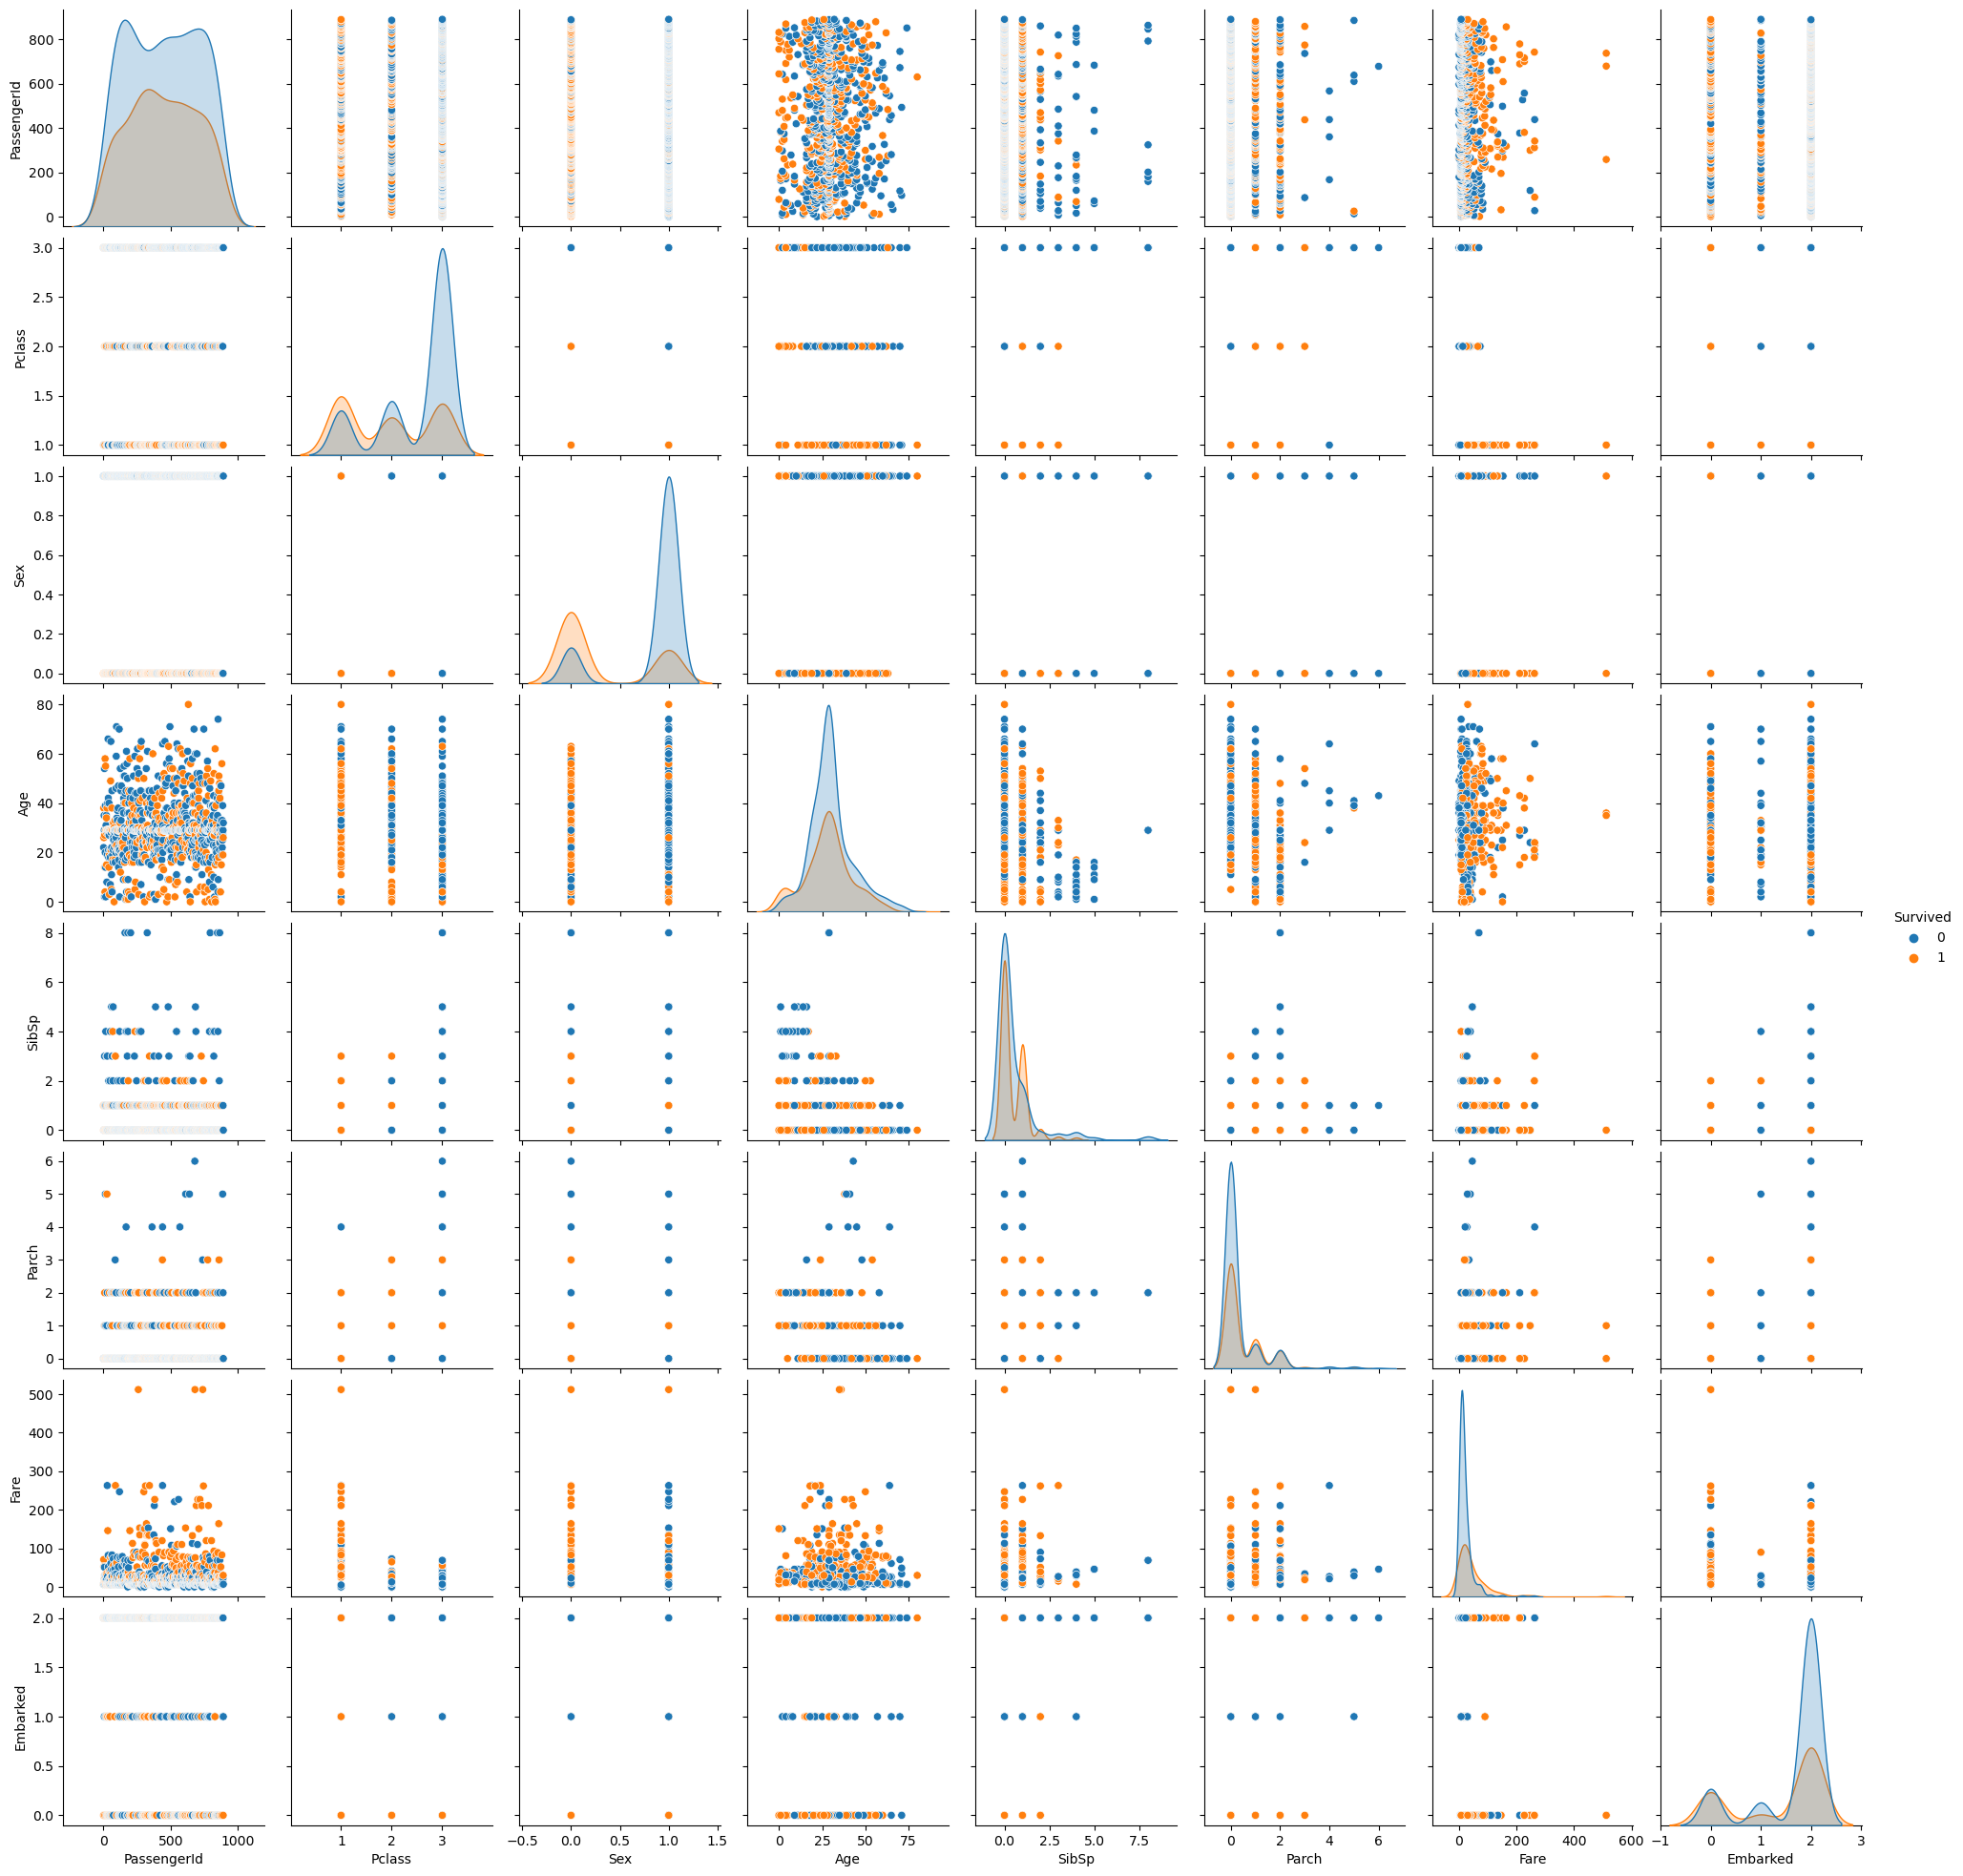

In [12]:
sns.pairplot(train_data, hue='Survived')

We notice from the above graphs that the key parameters based on which the passengers survivability was obtained was :
* Pclasss (Passengers Class), where class 1 passengers seemed to survive better than the others
* Sex was a criteria, in that 0 - Women had a better survivability that 1 - Men
* While the Age of the passengers by itself was not clearly divided into groups, the graph of age and sex showed that the combination of Age-Old and Sex-Women clearly fared better than the worst class which was Age-Old and Sex-Men.
* We also see that single pairs of siblings and spouses fared better than single travellers and larger groups. 
* Finally, parents of single children seemed to have fared well.

Now using these features, let us attempt to train a model, considering the features :

* Sex
* Pclass
* SibSp
* Parch
* Fare


In [13]:
y = train_data["Survived"]

features = ['Sex','Pclass', 'SibSp', 'Parch','Embarked']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = svm.SVC()
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [14]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Using this updated list of features and also the SVM classifier instead of the RandomForestClassifier, we are able to bump up the score on our Kaggle submission to 0.77751